In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

###### This is a pre-crawled dataset, taken as subset of a bigger dataset (more than 5.8 million products) that was created by extracting data from Flipkart.com, a leading Indian eCommerce store.

Content
This dataset has following fields:

* product_url
* product_name
* product_category_tree
* pid
* retail_price
* discounted_price
* image
* is_FK_Advantage_product
* description
* product_rating
* overall_rating
* brand
* product_specifications
* Acknowledgements

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
flipkart = pd.read_csv('flipkart_com-ecommerce_sample.csv')

In [15]:
flipkart.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [16]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
uniq_id                    20000 non-null object
crawl_timestamp            20000 non-null object
product_url                20000 non-null object
product_name               20000 non-null object
product_category_tree      20000 non-null object
pid                        20000 non-null object
retail_price               19922 non-null float64
discounted_price           19922 non-null float64
image                      19997 non-null object
is_FK_Advantage_product    20000 non-null bool
description                19998 non-null object
product_rating             20000 non-null object
overall_rating             20000 non-null object
brand                      14136 non-null object
product_specifications     19986 non-null object
dtypes: bool(1), float64(2), object(12)
memory usage: 2.2+ MB


In [17]:
flipkart.dropna(inplace=True)

In [19]:
flipkart.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [23]:
flipkart[flipkart['overall_rating']!='No rating available']

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
10,e54bc0a7c3429da2ebef0b30331fe3d2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/ladela-bellies/p/itmeh...,Ladela Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4KM2W3Z6EH5,1724.0,950.0,"[""http://img5a.flixcart.com/image/shoe/s/g/m/b...",False,Key Features of Ladela Bellies Brand: LADELA C...,5,5,Ladela,"{""product_specification""=>[{""key""=>""Occasion"",..."
59,d620fa0d35825bb3c0717e9d3446cc97,2016-04-05 17:56:58 +0000,http://www.flipkart.com/roadster-men-s-zipper-...,Roadster Men's Zipper Solid Cardigan,"[""Clothing >> Men's Clothing >> Winter & Seaso...",CGNEDFY77SGZTEQ2,1399.0,699.0,"[""http://img5a.flixcart.com/image/cardigan/e/q...",False,Key Features of Roadster Men's Zipper Solid Ca...,3.6,3.6,Roadster,"{""product_specification""=>[{""key""=>""Closure"", ..."
185,7ebca8e1830a1a7041f77c342b1282ee,2015-12-04 07:25:36 +0000,http://www.flipkart.com/roadster-skinny-fit-me...,Roadster Skinny Fit Fit Men's Jeans,"[""Clothing >> Men's Clothing >> Jeans >> Roads...",JEAE8CZGJ8PGGHRQ,2499.0,1249.0,"[""http://img5a.flixcart.com/image/jean/g/b/h/7...",True,Roadster Skinny Fit Fit Men's Jeans - Buy MD I...,3,3,Skinny Fit,"{""product_specification""=>[{""key""=>""Number of ..."
359,4889f91f48c3e1260a8fb3b3b83fe6f2,2016-01-06 18:20:45 +0000,http://www.flipkart.com/pure-source-psi-as-han...,Pure Source Psi-As-Hanggnrlx Relaxing Liquid A...,"[""Home Decor & Festive Needs >> Candles & Frag...",AIRE9B8EKTNR8J4B,1250.0,375.0,"[""http://img6a.flixcart.com/image/air-freshene...",False,Buy Pure Source Psi-As-Hanggnrlx Relaxing Liqu...,5,5,Pure Source,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
429,465662da5f4b41c475d51684084f59c7,2016-01-06 18:20:45 +0000,http://www.flipkart.com/clara-certified-katela...,Clara Certified Katela 3 cts or 3.25 ratti 4 P...,"[""Jewellery >> Rings""]",RNGEFP2XZSFFAGGV,3530.0,1570.0,"[""http://img6a.flixcart.com/image/ring/v/b/y/c...",False,Clara Certified Katela 3 cts or 3.25 ratti 4 P...,4,4,Clara,"{""product_specification""=>[{""key""=>""Sales Pack..."
572,2e147ae9af0687c2f3e42cefd1c4470c,2016-01-06 18:20:45 +0000,http://www.flipkart.com/nishtaa-yellow-gold-22...,Nishtaa Yellow Gold 22 K Ring,"[""Jewellery >> Rings""]",RNGDWKZHDVFQTDYV,7810.0,7420.0,"[""http://img5a.flixcart.com/image/ring/n/n/h/n...",False,Nishtaa Yellow Gold 22 K Ring\n ...,5,5,Nishtaa,"{""product_specification""=>[{""key""=>""Collection..."
1010,d02786918fdd1d7af6dc4e0cb5a9e91f,2016-03-03 23:09:59 +0000,http://www.flipkart.com/imported-banknote-test...,"Imported Banknote Tester, ball pen Permanent A...","[""Pens & Stationery >> Office Supplies >> Sket...",MAHEEVSWQSZUUFQY,800.0,280.0,"[""http://img6a.flixcart.com/image/marker-highl...",False,"Specifications of Imported Banknote Tester, ba...",5,5,Imported,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1019,3602107a0212e55187c7bc96d3442ca7,2016-03-03 23:09:59 +0000,http://www.flipkart.com/autofurnish-car-cover-...,Autofurnish Car Cover For Santro Xing,"[""Automotive >> Accessories & Spare parts >> C...",CCVE3Z23WWHMGHFY,1530.0,437.0,"[""http://img5a.flixcart.com/image/car-cover/y/...",False,Specifications of Autofurnish Car Cover For Sa...,2.4,2.4,Autofurnish,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1031,4b1cc3f6ccfd2f4c7c57a1ab97fb0136,2016-03-03 23:09:59 +0000,http://www.flipkart.com/indiano-loafers/p/itme...,INDIANO Loafers,"[""Footwear >> Women's Footwear >> Casual Shoes...",SHOEG52R2AKHFYHH,1199.0,649.0,"[""http://img5a.flixcart.com/image/shoe/m/c/e/t...",False,Specifications of INDIANO Loafers General Occa...,5,5,INDIANO,"{""product_specification""=>[{""key""=>""Occasion"",..."
1035,49907d6f72c714ea52571212dbd59900,2016-03-03 23:09:59 +0000,http://www.flipkart.com/rainfun-car-cover-800/...,Rainfun Car Cover For 80

In [24]:
rated_dataset = flipkart[flipkart['overall_rating']!='No rating available']

In [25]:
rated_dataset

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
10,e54bc0a7c3429da2ebef0b30331fe3d2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/ladela-bellies/p/itmeh...,Ladela Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4KM2W3Z6EH5,1724.0,950.0,"[""http://img5a.flixcart.com/image/shoe/s/g/m/b...",False,Key Features of Ladela Bellies Brand: LADELA C...,5,5,Ladela,"{""product_specification""=>[{""key""=>""Occasion"",..."
59,d620fa0d35825bb3c0717e9d3446cc97,2016-04-05 17:56:58 +0000,http://www.flipkart.com/roadster-men-s-zipper-...,Roadster Men's Zipper Solid Cardigan,"[""Clothing >> Men's Clothing >> Winter & Seaso...",CGNEDFY77SGZTEQ2,1399.0,699.0,"[""http://img5a.flixcart.com/image/cardigan/e/q...",False,Key Features of Roadster Men's Zipper Solid Ca...,3.6,3.6,Roadster,"{""product_specification""=>[{""key""=>""Closure"", ..."
185,7ebca8e1830a1a7041f77c342b1282ee,2015-12-04 07:25:36 +0000,http://www.flipkart.com/roadster-skinny-fit-me...,Roadster Skinny Fit Fit Men's Jeans,"[""Clothing >> Men's Clothing >> Jeans >> Roads...",JEAE8CZGJ8PGGHRQ,2499.0,1249.0,"[""http://img5a.flixcart.com/image/jean/g/b/h/7...",True,Roadster Skinny Fit Fit Men's Jeans - Buy MD I...,3,3,Skinny Fit,"{""product_specification""=>[{""key""=>""Number of ..."
359,4889f91f48c3e1260a8fb3b3b83fe6f2,2016-01-06 18:20:45 +0000,http://www.flipkart.com/pure-source-psi-as-han...,Pure Source Psi-As-Hanggnrlx Relaxing Liquid A...,"[""Home Decor & Festive Needs >> Candles & Frag...",AIRE9B8EKTNR8J4B,1250.0,375.0,"[""http://img6a.flixcart.com/image/air-freshene...",False,Buy Pure Source Psi-As-Hanggnrlx Relaxing Liqu...,5,5,Pure Source,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
429,465662da5f4b41c475d51684084f59c7,2016-01-06 18:20:45 +0000,http://www.flipkart.com/clara-certified-katela...,Clara Certified Katela 3 cts or 3.25 ratti 4 P...,"[""Jewellery >> Rings""]",RNGEFP2XZSFFAGGV,3530.0,1570.0,"[""http://img6a.flixcart.com/image/ring/v/b/y/c...",False,Clara Certified Katela 3 cts or 3.25 ratti 4 P...,4,4,Clara,"{""product_specification""=>[{""key""=>""Sales Pack..."
572,2e147ae9af0687c2f3e42cefd1c4470c,2016-01-06 18:20:45 +0000,http://www.flipkart.com/nishtaa-yellow-gold-22...,Nishtaa Yellow Gold 22 K Ring,"[""Jewellery >> Rings""]",RNGDWKZHDVFQTDYV,7810.0,7420.0,"[""http://img5a.flixcart.com/image/ring/n/n/h/n...",False,Nishtaa Yellow Gold 22 K Ring\n ...,5,5,Nishtaa,"{""product_specification""=>[{""key""=>""Collection..."
1010,d02786918fdd1d7af6dc4e0cb5a9e91f,2016-03-03 23:09:59 +0000,http://www.flipkart.com/imported-banknote-test...,"Imported Banknote Tester, ball pen Permanent A...","[""Pens & Stationery >> Office Supplies >> Sket...",MAHEEVSWQSZUUFQY,800.0,280.0,"[""http://img6a.flixcart.com/image/marker-highl...",False,"Specifications of Imported Banknote Tester, ba...",5,5,Imported,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1019,3602107a0212e55187c7bc96d3442ca7,2016-03-03 23:09:59 +0000,http://www.flipkart.com/autofurnish-car-cover-...,Autofurnish Car Cover For Santro Xing,"[""Automotive >> Accessories & Spare parts >> C...",CCVE3Z23WWHMGHFY,1530.0,437.0,"[""http://img5a.flixcart.com/image/car-cover/y/...",False,Specifications of Autofurnish Car Cover For Sa...,2.4,2.4,Autofurnish,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1031,4b1cc3f6ccfd2f4c7c57a1ab97fb0136,2016-03-03 23:09:59 +0000,http://www.flipkart.com/indiano-loafers/p/itme...,INDIANO Loafers,"[""Footwear >> Women's Footwear >> Casual Shoes...",SHOEG52R2AKHFYHH,1199.0,649.0,"[""http://img5a.flixcart.com/image/shoe/m/c/e/t...",False,Specifications of INDIANO Loafers General Occa...,5,5,INDIANO,"{""product_specification""=>[{""key""=>""Occasion"",..."
1035,49907d6f72c714ea52571212dbd59900,2016-03-03 23:09:59 +0000,http://www.flipkart.com/rainfun-car-cover-800/...,Rainfun Car Cover For 80

In [27]:
rated_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 10 to 19948
Data columns (total 15 columns):
uniq_id                    918 non-null object
crawl_timestamp            918 non-null object
product_url                918 non-null object
product_name               918 non-null object
product_category_tree      918 non-null object
pid                        918 non-null object
retail_price               918 non-null float64
discounted_price           918 non-null float64
image                      918 non-null object
is_FK_Advantage_product    918 non-null bool
description                918 non-null object
product_rating             918 non-null object
overall_rating             918 non-null object
brand                      918 non-null object
product_specifications     918 non-null object
dtypes: bool(1), float64(2), object(12)
memory usage: 108.5+ KB


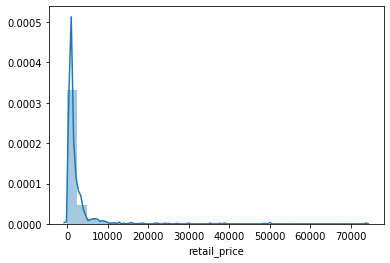

In [39]:
rated_dataset['retail_price']

sns.distplot(rated_dataset['retail_price'], bins=30)

In [40]:
rated_dataset['retail_price'].max()

73500.0

In [41]:
rated_dataset[rated_dataset['retail_price']==73500.0]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
11542,4e3e2624f30da4c66c52de92f9b88f18,2015-12-31 09:19:31 +0000,http://www.flipkart.com/durian-clinton-a-3-lea...,Durian Clinton/A/3 Leather 3 Seater Sofa,"[""Furniture >> Living Room >> Sofas & Sectiona...",SOFE94HW8TPTGPNX,73500.0,47775.0,"[""http://img6a.flixcart.com/image/sofa-section...",False,Buy Durian Clinton/A/3 Leather 3 Seater Sofa f...,5,5,Durian,"{""product_specification""=>[{""value""=>""1 Sofa""}..."


In [2]:
si = SentimentIntensityAnalyzer()
def check_sentiment(message):
    if type(message)== str:
        sentiment = si.polarity_scores(message)
        print(sentiment)
        if 0 <= sentiment['compound'] <= 0.3: 
            return 'Neutral'
        elif sentiment['compound'] >=0.3:
            return 'Positive'
        else:
            return 'Negative'

In [12]:
check_sentiment(Feedback1)

{'neg': 0.015, 'neu': 0.687, 'pos': 0.298, 'compound': 0.995}


'Positive'

In [9]:
from textblob import TextBlob

In [11]:
Feedback1 = 'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [11]:
blob1 = TextBlob(Feedback1)


In [12]:
blob1.sentiment

Sentiment(polarity=0.40246913580246907, subjectivity=0.6591122868900646)